# 다차원 텐서 (다차원 배열)

In [1]:
import numpy as np

### 다차원 배열의 계산 복습

In [4]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[7, 8, 9], [10, 11, 12]])

add = A + B

vec = np.array([1, 2, 3])

add_vec = A + vec # 브로드캐스팅

add, add_vec

(array([[ 8, 10, 12],
        [14, 16, 18]]),
 array([[2, 4, 6],
        [5, 7, 9]]))

In [6]:
A.dot(B.T) # 행렬곱

array([[ 50,  68],
       [122, 167]])

### 다차원 배열의 계산으로 순전파 구현

In [15]:
# 입력 데이터
X = np.random.randn(4, 5) # 4개의 샘플, 5차원 feature

# 가중치
W = np.random.randn(5, 3) # 5개의 입력(feature), 3개의 뉴런으로 구성된 레이어

# 편향
b = np.random.randn(1, 3)

# 선형 계산 (W * X + b)
z = np.dot(X, W) + b

# ReLU 활성화 함수
result = np.maximum(z, 0)

result

array([[0.        , 0.        , 1.46420796],
       [0.        , 1.81999602, 0.10710412],
       [0.        , 2.01724921, 1.9791856 ],
       [0.03872054, 0.        , 0.14704677]])

# 다층 퍼셉트론

In [30]:
def softmax(z):
    # e_z = np.exp(z - np.max(z))
    # return e_z / e_z.sum(axis=0)
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

X = np.random.randn(6, 10) # 6개의 샘플, 10차원 feature

# 은닉층 : 10개의 입력 -> 8개의 뉴런
W1 = np.random.randn(10, 8)
b1 = np.random.randn(1, 8)

# 출력층 : 8개의 입력 -> 4개의 클래스
W2 = np.random.randn(8, 4)
b2 = np.random.randn(1, 4)

# 은닉층 계산 (선형 계산 + tanh 활성화 함수)
z1 = np.dot(X, W1) + b1
result = np.tanh(z1)

# 출력층 계산 (선형 계산 + softmax 활성화 함수)
z2 = np.dot(result, W2) + b2
result = softmax(z2)

result

array([[2.73482123e-01, 3.43395167e-01, 3.34270561e-03, 9.46665882e-02],
       [6.05142987e-02, 3.97767769e-02, 6.94692277e-04, 1.52294255e-01],
       [9.55969619e-02, 3.76308205e-01, 1.47066209e-04, 2.54742497e-02],
       [9.28744036e-02, 2.93034016e-04, 9.73106286e-01, 7.18699850e-02],
       [1.27467100e-01, 1.97550407e-02, 2.26157769e-02, 5.05328462e-01],
       [3.50065113e-01, 2.20471776e-01, 9.34726088e-05, 1.50366460e-01]])

# 이미지 데이터 예시

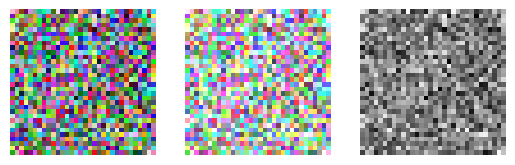

In [57]:
import matplotlib.pyplot as plt

batch_size = 5 # 샘플의 개수
channels = 3 # RGB
height = 32 # 이미지 높이
width = 32 # 이미지 너비

images = np.random.rand(batch_size, channels, height, width)

bright_images = np.clip(images + .2, 0, 1) # 0.2를 더하지만 0과 1 사이의 값으로 클리핑

gray_image = np.mean(images, axis=1)

# PyTorch의 경우 이미지 데이터를 (채널 수, 높이, 너비) 순서로 저장
# 따라서 matploylib.pyploy.imshow()를 사용하여 이미지를 시각화하기 위해서는 (높이, 너비, 채널 수) 순서로 변경해야 함
# 이때 np.transpose() 함수를 사용하여 축 순서를 변경할 수 있음
images_for_display = images[0].transpose(1, 2, 0)
bright_images_for_display = bright_images[0].transpose(1, 2, 0)

plt.subplot(1, 3, 1)
plt.imshow(images_for_display)
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(bright_images_for_display)
plt.axis('off')
gray_image_for_display = gray_image[0]

plt.subplot(1, 3, 3)
plt.imshow(gray_image_for_display, cmap='gray')
plt.axis('off')

plt.show()